### 4.3.4. 객체 탐지

In [1]:
import ObjectDetector, FileIO, Flux
yolo = ObjectDetector.YOLO.v3_COCO();

(1) conv(3,3->32) => (2) conv(3,32->64) => (3) conv(1,64->32) => (4) conv(3,32->64) => 
(5) shortcut(2,4) => (6) conv(3,64->128) => (7) conv(1,128->64) => (8) conv(3,64->128) => 
(9) shortcut(6,8) => (10) conv(1,128->64) => (11) conv(3,64->128) => 
(12) shortcut(9,11) => (13) conv(3,128->256) => (14) conv(1,256->128) => (15) conv(3,128->256) => 
(16) shortcut(13,15) => (17) conv(1,256->128) => (18) conv(3,128->256) => 
(19) shortcut(16,18) => (20) conv(1,256->128) => (21) conv(3,128->256) => 
(22) shortcut(19,21) => (23) conv(1,256->128) => (24) conv(3,128->256) => 
(25) shortcut(22,24) => (26) conv(1,256->128) => (27) conv(3,128->256) => 
(28) shortcut(25,27) => (29) conv(1,256->128) => (30) conv(3,128->256) => 
(31) shortcut(28,30) => (32) conv(1,256->128) => (33) conv(3,128->256) => 
(34) shortcut(31,33) => (35) conv(1,256->128) => (36) conv(3,128->256) => 
(37) shortcut(34,36) => (38) conv(3,256->512) => (39) conv(1,512->256) => 

(40) conv(3,256->512) => 
(41) shortcut(38,40) => (42) conv(1,512->256) => (43) conv(3,256->512) => 
(44) shortcut(41,43) => (45) conv(1,512->256) => (46) conv(3,256->512) => 
(47) shortcut(44,46) => (48) conv(1,512->256) => (49) conv(3,256->512) => 
(50) shortcut(47,49) => (51) conv(1,512->256) => (52) conv(3,256->512) => 
(53) shortcut(50,52) => (54) conv(1,512->256) => (55) conv(3,256->512) => 
(56) shortcut(53,55) => (57) conv(1,512->256) => (58) conv(3,256->512) => 
(59) shortcut(56,58) => (60) conv(1,512->256) => (61) conv(3,256->512) => 
(62) shortcut(59,61) => (63) conv(3,512->1024) => (64) conv(1,1024->512) => (65) conv(3,512->1024) => 
(66) shortcut(63,65) => (67) conv(1,1024->512) => (68) conv(3,512->1024) => 
(69) shortcut(66,68) => 

(70) conv(1,1024->512) => (71) conv(3,512->1024) => 
(72) shortcut(69,71) => (73) conv(1,1024->512) => (74) conv(3,512->1024) => 
(75) shortcut(72,74) => (76) conv(1,1024->512) => (77) conv(3,512->1024) => (78) conv(1,1024->512) => (79) conv(3,512->1024) => (80) conv(1,1024->512) => 

(81) conv(3,512->1024) => (82) conv(1,1024->255) => (83) YOLO || 
(84) route(80,) => (85) conv(1,512->256) => (86) upsample(2) => 
(87) route(86,62) => (88) conv(1,768->256) => (89) conv(3,256->512) => (90) conv(1,512->256) => (91) conv(3,256->512) => (92) conv(1,512->256) => (93) conv(3,256->512) => (94) conv(1,512->255) => (95) YOLO || 
(96) route(92,) => (97) conv(1,256->128) => (98) upsample(2) => 
(99) route(98,37) => (100) conv(1,384->128) => (101) conv(3,128->256) => (102) conv(1,256->128) => (103) conv(3,128->256) => (104) conv(1,256->128) => (105) conv(3,128->256) => (106) conv(1,256->255) => (107) YOLO || 



Generating chains and outputs: 
1 

2 

3 4 

5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 

25 26 27 28 

29 30 

객체 탐지

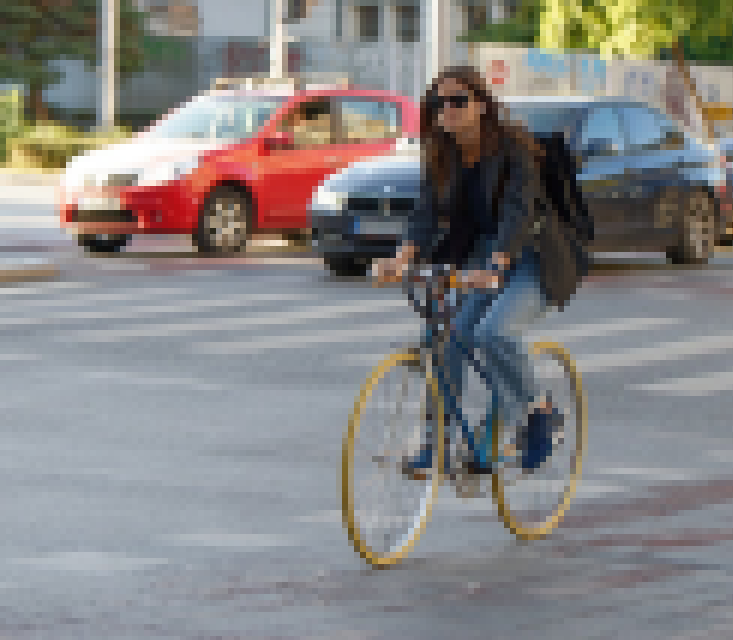

┌ Warning: Output swatches are reduced due to the large size (640×733).
│ Load the ImageShow package for large images.
└ @ Colors /home/tyfun/.julia/packages/Colors/mIuXl/src/display.jl:159


In [2]:
img = FileIO.load("bicyclist_pixabay.jpg")

In [3]:
p_img, padding = ObjectDetector.prepareImage(img, yolo);
res = yolo(Flux.batch([p_img]))

89×5 Matrix{Float32}:
 0.0643244   0.406506     0.514263     0.462371     0.704931
 0.171475    0.217845     0.14195      0.429977     0.226013
 0.582222    0.919061     0.780221     0.794351     0.810006
 0.411361    0.449018     0.804668     0.832272     0.487654
 0.998987    0.800628     0.977263     0.998536     0.693454
 1.38134f-5  0.00019323   0.999606     5.28734f-5   0.000425852
 1.09284f-7  0.00027843   0.000750146  0.998325     5.07387f-6
 0.964057    0.882774     3.63858f-5   2.3097f-5    0.000113042
 3.1764f-6   0.00522357   3.78737f-5   3.70899f-5   2.0104f-5
 1.39559f-7  0.000125014  1.40857f-6   2.73875f-7   1.15302f-6
 ⋮                                                 
 5.68585f-9  2.98803f-5   2.69915f-6   1.29174f-5   8.20732f-7
 8.52292f-9  1.23959f-5   1.13147f-6   6.54477f-6   4.05295f-6
 2.5998f-9   1.82896f-6   1.95952f-6   2.42781f-7   1.00833f-5
 3.73927f-9  3.14001f-5   4.79166f-7   7.67049f-7   1.64043f-6
 6.31363f-8  3.01505f-5   1.64238f-6   9.90356f-7   2

탐지 결과 그리기

In [4]:
classes = ["person", "bicycle", "car", "motorcycle", "airplane", "bus", "train", "truck", "boat", "traffic light", "fire hydrant", "stop sign", "parking meter", "bench", "bird", "cat", "dog", "horse", "sheep", "cow", "elephant", "bear", "zebra", "giraffe", "backpack", "umbrella", "handbag", "tie", "suitcase", "frisbee", "skis", "snowboard", "sports ball", "kite", "baseball bat", "baseball glove", "skateboard", "surfboard", "tennis racket", "bottle", "wine glass", "cup", "fork", "knife", "spoon", "bowl", "banana", "apple", "sandwich", "orange", "broccoli", "carrot", "hot dog", "pizza", "donut", "cake", "chair", "couch", "potted plant", "bed", "dining table", "toilet", "tv", "laptop", "mouse", "remote", "keyboard", "cell phone", "microwave", "oven", "toaster", "sink", "refrigerator", "book", "clock", "vase", "scissors", "teddy bear", "hair drier", "toothbrush"];

In [5]:
import Colors
import SimpleDraw as SD
function drawDetection(img, model, padding, results)
    drawDetection!(copy(img), model, padding, results)
end

drawDetection (generic function with 1 method)

In [6]:
function drawDetection!(img, model, padding, results)
    imgratio = size(img,2) / size(img,1)
    modelratio = model.cfg[:width] / model.cfg[:height]
    x1i, y1i, x2i, y2i = [1, 2, 3, 4]
    if modelratio > imgratio
        h, w = size(img,1) .* (1, modelratio)
    else
        h, w = size(img,2) ./ (modelratio, 1)
    end
    length(results) == 0 && return img
    for i in 1:size(results,2)
        bbox = results[1:4, i] .- padding # bounding box
        x1, y1 = round(Int, bbox[x1i] * w), round(Int, bbox[y1i] * h)
        rect_p0 = SD.Point(y1, x1)
        rect_h = round(Int, (bbox[y2i] - bbox[y1i]) * h)
        rect_w = round(Int, (bbox[x2i] - bbox[x1i]) * w)
        shape = SD.ThickRectangle(rect_p0, rect_h, rect_w, 2)
        SD.draw!(img, shape, Colors.RGB(1,1,1))
        
        class = classes[Int(results[end-1, i])]
        conf = round(results[5,i]; digits=4)
        x1, y1 = round(Int, bbox[x1i] * w), round(Int, bbox[y1i] * h)
        txt_p0 = SD.Point(y1 + 3, x1 + 3)
        txt = SD.TextLine(txt_p0, "$class $conf", SD.TERMINUS_16_8)
        SD.draw!(img, txt, Colors.RGB(1,1,1))
    end
    return img
end

drawDetection! (generic function with 1 method)

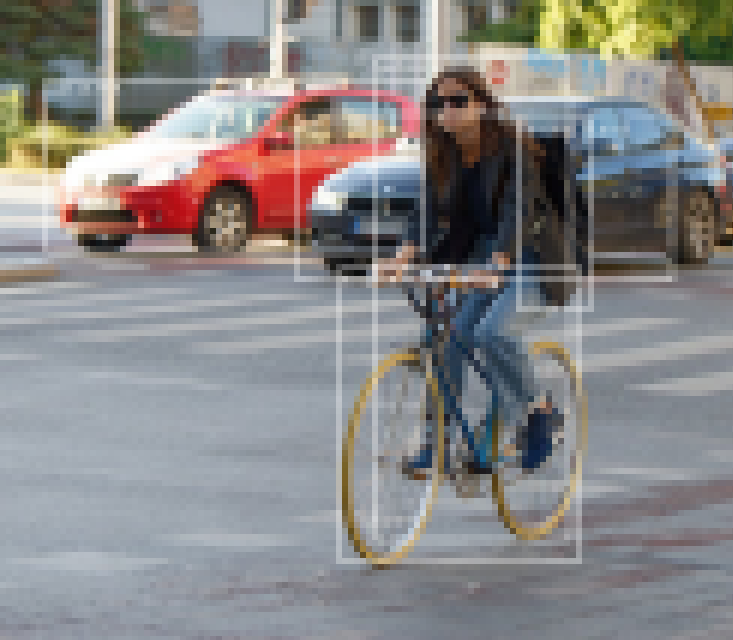

┌ Warning: Output swatches are reduced due to the large size (640×733).
│ Load the ImageShow package for large images.
└ @ Colors /home/tyfun/.julia/packages/Colors/mIuXl/src/display.jl:159


In [7]:
imgBoxes = drawDetection(img, yolo, padding, res)

In [8]:
FileIO.save("bicyclist_boxed.png", imgBoxes)